## Dataset
We use Credit Card Data from book "Econometric Analysis". https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

* The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

## Preparation

* Create the target variable by mapping yes to 1 and no to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'AER_credit_card_data.csv'
df = pd.read_csv(data)

In [3]:
df.shape

(1319, 12)

In [4]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
values_mapping = {"yes" : 1,
                     "no" : 0}
df.card = df.card.map(values_mapping)

In [6]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [11]:
y_train = df_train.card
y_val = df_val.card
y_test = df_test.card

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
df_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

For each numerical variable, use it as score and compute AUC with the card variable.
Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


In [14]:
df.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [15]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

In [16]:
categorical = ['owner', 'selfemp']

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
auc_score = []
for col in numerical:
    auc_col = roc_auc_score(df_train['card'], df_train[col])
    if auc_col < 0.5:
        auc_col = roc_auc_score(df_train['card'], -df_train[col])
    auc_score.append((col, auc_col))

In [19]:
auc_score.sort(key=lambda tup: tup[1], reverse=True)
auc_score

[('expenditure', 0.991042345276873),
 ('share', 0.989183643423692),
 ('reports', 0.7166629860689376),
 ('active', 0.6043173411362006),
 ('income', 0.5908049467233478),
 ('majorcards', 0.5343859842838476),
 ('dependents', 0.5327757227773791),
 ('months', 0.5294217780967629),
 ('age', 0.5240020979407055)]

 'share' has the highest AUC from [reports, dependents, active, share]

## Training the model

From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

### One-hot-encoding

In [20]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [24]:
train_dicts[0]

{'owner': 'no',
 'selfemp': 'no',
 'reports': 3,
 'age': 40.5,
 'income': 4.0128,
 'share': 0.0002990431,
 'expenditure': 0.0,
 'dependents': 1,
 'months': 12,
 'majorcards': 1,
 'active': 17}

In [25]:
dv = DictVectorizer(sparse=False)

In [26]:
X_train = dv.fit_transform(train_dicts)

In [27]:
X_train[0]

array([1.700000e+01, 4.050000e+01, 1.000000e+00, 0.000000e+00,
       4.012800e+00, 1.000000e+00, 1.200000e+01, 1.000000e+00,
       0.000000e+00, 3.000000e+00, 1.000000e+00, 0.000000e+00,
       2.990431e-04])

In [28]:
dv.get_feature_names_out()

array(['active', 'age', 'dependents', 'expenditure', 'income',
       'majorcards', 'months', 'owner=no', 'owner=yes', 'reports',
       'selfemp=no', 'selfemp=yes', 'share'], dtype=object)

In [29]:
val_dicts = df_val.to_dict(orient='records')

In [30]:
X_val = dv.transform(val_dicts)

### Training LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [32]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
y_pred = model.predict_proba(X_val)[:, 1]

## Question 2

What's the AUC of this model on the validation dataset?

In [34]:
model_score = roc_auc_score(y_val, y_pred)
model_score.round(3)

0.995

## Question 3

Now let's compute precision and recall for our model.

Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01.
For each threshold, compute precision and recall. 
Plot them

In [35]:
thresholds = np.linspace(0, 1, 101)
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, tn, fn))

In [36]:
columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)

In [37]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)


In [39]:
df_scores[df_scores.precision == df_scores.recall]

,threshold,tp,fp,tn,fn,precision,recall
24,0.24,206,5,48,5,0.976303,0.976303
25,0.25,206,5,48,5,0.976303,0.976303
26,0.26,206,5,48,5,0.976303,0.976303
27,0.27,206,5,48,5,0.976303,0.976303
28,0.28,206,5,48,5,0.976303,0.976303
29,0.29,206,5,48,5,0.976303,0.976303


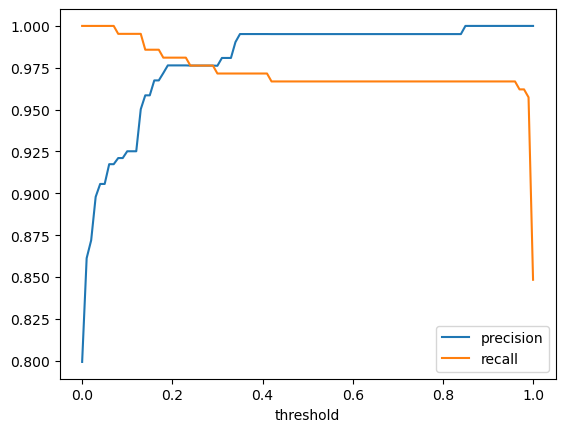

In [40]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')
plt.xlabel('threshold')
plt.legend()

## Question 4

Compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set, using formula
$$ F_1 = 2 \cdot \frac{P \cdot R}{P + R} $$

In [41]:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall) 

In [42]:
df_scores.sort_values(by='f1', ascending=False).head(10)

,threshold,tp,fp,tn,fn,precision,recall,f1
39,0.39,205,1,52,6,0.995146,0.971564,0.983213
38,0.38,205,1,52,6,0.995146,0.971564,0.983213
37,0.37,205,1,52,6,0.995146,0.971564,0.983213
36,0.36,205,1,52,6,0.995146,0.971564,0.983213
35,0.35,205,1,52,6,0.995146,0.971564,0.983213
41,0.41,205,1,52,6,0.995146,0.971564,0.983213
40,0.40,205,1,52,6,0.995146,0.971564,0.983213
88,0.88,204,0,53,7,1.000000,0.966825,0.983133
85,0.85,204,0,53,7,1.000000,0.966825,0.983133
86,0.86,204,0,53,7,1.000000,0.966825,0.983133


## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

* KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

In [43]:
from sklearn.model_selection import KFold

In [88]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model 

In [89]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [90]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [74]:
#!pip install tqdm

In [75]:
from tqdm.auto import tqdm

In [91]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card
    y_val = df_val.card
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [92]:
np.mean(scores), np.std(scores)

(0.9964498276814243, 0.0027434713804377724)

## Question 6

* Iterate over the following C values: [0.01, 0.1, 1, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [93]:
C_values = [0.01, 0.1, 1, 10]
C_auc_scores = []
for C in tqdm(C_values):
    auc_scores = []
    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card
        y_val = df_val.card

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)
    C_auc_scores.append((C, np.mean(auc_scores), np.std(auc_scores)))
    

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [94]:
C_auc_scores

[(0.01, 0.9918810292344007, 0.00559887235402738),
 (0.1, 0.9950557137157224, 0.003954138088244392),
 (1, 0.9964498276814243, 0.0027434713804377724),
 (10, 0.9963886109436032, 0.0028151486609295684)]

In [95]:
C_auc_scores.sort(key=lambda tup: tup[1], reverse=True)

In [96]:
C_auc_scores

[(1, 0.9964498276814243, 0.0027434713804377724),
 (10, 0.9963886109436032, 0.0028151486609295684),
 (0.1, 0.9950557137157224, 0.003954138088244392),
 (0.01, 0.9918810292344007, 0.00559887235402738)]

C = 1 leads to the best mean score